In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load the dataset
data = pd.read_csv('/content/Crop_recommendation.csv')



In [2]:
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [3]:
data.isna().sum()

,0
N,0
P,0
K,0
temperature,0
humidity,0
ph,0
rainfall,0
label,0


In [4]:
# Separate features (X) and target variable (y)
X = data.drop('label', axis=1)  # Replace 'target_variable_column'
y = data['label']

In [5]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Initialize and train the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42) # You can adjust n_estimators
rf_classifier.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [7]:
# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9931818181818182


In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load the dataset
data = pd.read_csv('/content/Crop_recommendation.csv')

In [13]:
# Separate features (X) and target variable (y)
X = data.drop('label', axis=1)  # Replace 'target_variable_column'
y = data['label']

In [14]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# Initialize and train the SVM classifier
svm_classifier = SVC(kernel='linear', random_state=42) # You can change the kernel (e.g., 'rbf', 'poly')
svm_classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [16]:
# Make predictions on the test set
y_pred = svm_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9795454545454545


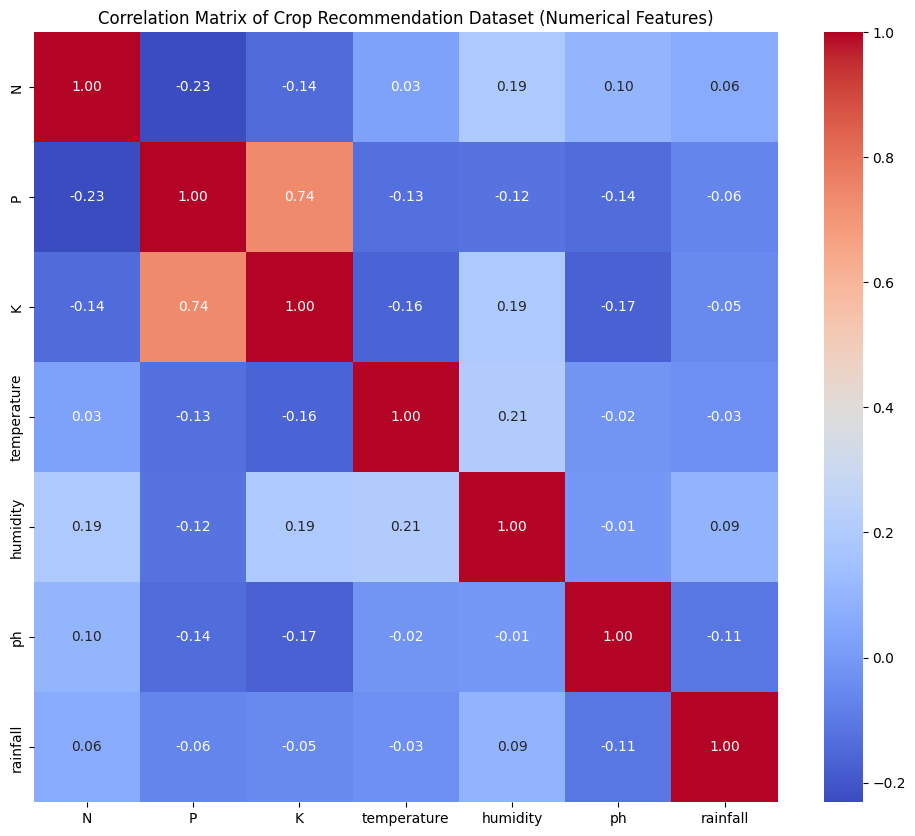

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('/content/Crop_recommendation.csv')

# Select only numerical features for correlation analysis
numerical_features = data.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numerical_features.corr()

# Create the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Crop Recommendation Dataset (Numerical Features)')
plt.show()

In [28]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load the dataset
data = pd.read_csv('/content/Crop_recommendation.csv')

In [19]:
# Separate features (X) and target variable (y)
X = data.drop('label', axis=1)
y = data['label']

In [20]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
# Initialize and train the Logistic Regression model
logreg_classifier = LogisticRegression(max_iter=1000, random_state=42) # Increased max_iter
logreg_classifier.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000, random_state=42)

In [24]:
# Make predictions on the test set
y_pred = logreg_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9522727272727273


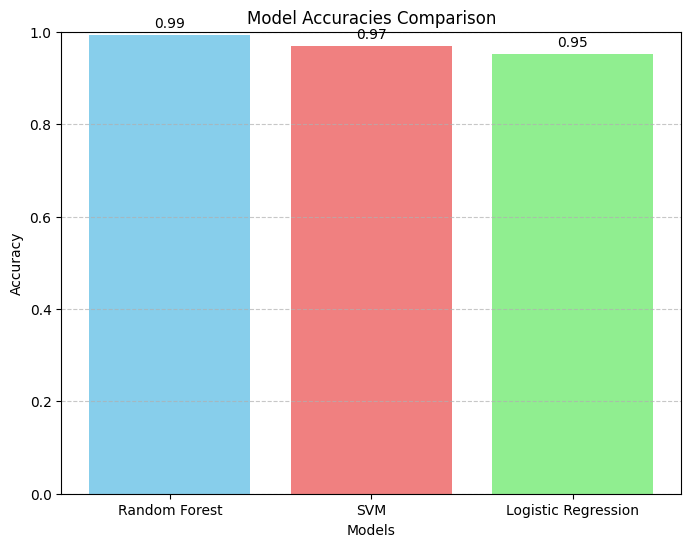

In [25]:
import matplotlib.pyplot as plt

# Accuracy scores
model_names = ['Random Forest', 'SVM', 'Logistic Regression']
accuracies = [0.993, 0.97, 0.952]

# Create the bar plot
plt.figure(figsize=(8, 6))
plt.bar(model_names, accuracies, color=['skyblue', 'lightcoral', 'lightgreen'])
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Model Accuracies Comparison")
plt.ylim(0, 1)  # Set y-axis limit to 0-1 for accuracy
plt.grid(axis='y', linestyle='--', alpha=0.7)


# Add accuracy values on top of each bar
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.01, f"{v:.2f}", ha='center', va='bottom')

plt.show()

In [36]:
import joblib

# Save the trained model to a file
joblib.dump(rf_classifier, "crop_recommendation_model.pkl")


['crop_recommendation_model.pkl']

In [37]:
import gradio as gr
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Load the dataset (replace with your actual path)
data = pd.read_csv('/content/Crop_recommendation.csv')

# Prepare the data (same as your existing code)
X = data.drop('label', axis=1)
y = data['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the RandomForestClassifier (you can choose another model here if preferred)
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

def predict_crop(N, P, K, temperature, humidity, ph, rainfall):
    """Predicts the crop based on input features."""
    input_data = pd.DataFrame([[N, P, K, temperature, humidity, ph, rainfall]],
                              columns=['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall'])
    prediction = rf_classifier.predict(input_data)[0]
    return prediction

# Create the Gradio interface
iface = gr.Interface(
    fn=predict_crop,
    inputs=[
        gr.Number(label="Nitrogen (N)"),
        gr.Number(label="Phosphorus (P)"),
        gr.Number(label="Potassium (K)"),
        gr.Number(label="Temperature (°C)"),
        gr.Number(label="Humidity (%)"),
        gr.Number(label="pH"),
        gr.Number(label="Rainfall (mm)"),
    ],
    outputs=gr.Textbox(label="Predicted Crop"),
    title="Crop Recommendation",
    description="Enter the features to predict the best crop."
)

# Launch the interface
iface.launch()


It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://59f01cac7ec61c7e6a.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [30]:
!pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.1/54.1 MB 16.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.9/322.9 kB 21.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 23.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 4.3 MB/s eta 0:00:00
